In [ ]:
!pip install yfinance

[*********************100%***********************]  3 of 3 completed


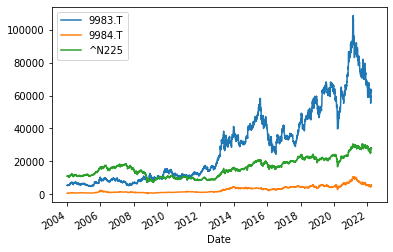

In [ ]:
import plotly.express as px
import yfinance as yf
import datetime

start = datetime.date(2004,1,1)
end  = datetime.date(2022,3,31)

# ソフトバンクグループ、ファーストリテイリング、日経平均株価の株価データを取得
df = yf.download(["9984.T", "9983.T", "^N225"], start=start, end=end)["Adj Close"]

# 調整後終値をプロット
df.plot()

In [ ]:
import plotly.express as px
import yfinance as yf
import datetime

start = datetime.date(2004,1,1)
end  = datetime.date(2022,3,31)

df = yf.download("^N225", start=start, end=end).  # 日経平均
fig = px.scatter(df, x=df.index, y="Close", trendline="ols")
fig.show()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = yf.download("^GSPC", start=start, end=end)
fig = px.scatter(df, x=df.index, y="Close", trendline="ols")
fig.show()

[*********************100%***********************]  1 of 1 completed


In [ ]:
!pip install prophet

[*********************100%***********************]  1 of 1 completed


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmwojmswz/3fi3zqoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmwojmswz/v1ojghb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29543', 'data', 'file=/tmp/tmpmwojmswz/3fi3zqoa.json', 'init=/tmp/tmpmwojmswz/v1ojghb8.json', 'output', 'file=/tmp/tmpmwojmswz/prophet_modelkja_kb1k/prophet_model-20221022172802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


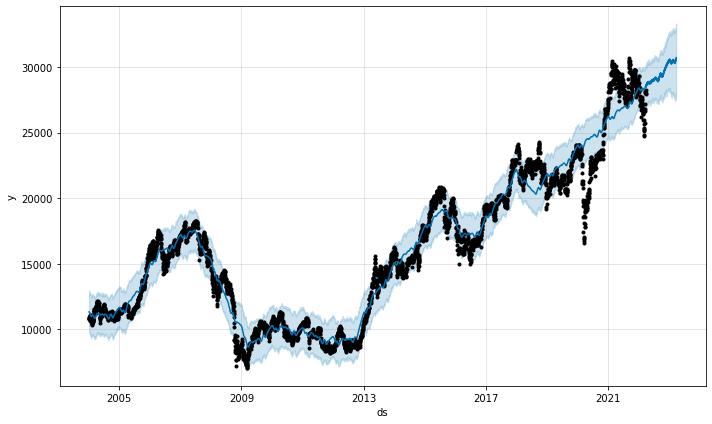

In [4]:
from prophet import Prophet
import yfinance as yf
import datetime

start = datetime.date(2004,1,1)
end  = datetime.date(2022,3,31)

df = yf.download("^N225", start=start, end=end)

df["ds"] = df.index    # dsカラムに日付を格納
df = df.rename(columns={'Close': 'y'})  # Closeカラムの名前をyに変更

prop = Prophet()
prop.fit(df)  # データフレームをセット
future = prop.make_future_dataframe(periods=365)  # 365日の期間を設定
forecast = prop.predict(future)  # 予想を実行
fig = prop.plot(forecast)  # 結果の取得と表示
fig.show()